In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.00, high=180.00, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print('Beginning Data Retrieval     ')
print('-----------------------------')

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
   
# Indicate that Data Loading is complete.
print('-----------------------------')
print('Data Retrieval Complete      ')
print('-----------------------------')


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lata
Processing Record 2 of Set 1 | victoria
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | saskylakh
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | laguna de perlas
Processing Record 8 of Set 1 | wajir
Processing Record 9 of Set 1 | port-cartier
Processing Record 10 of Set 1 | kruisfontein
Processing Record 11 of Set 1 | saint austell
Processing Record 12 of Set 1 | media luna
Processing Record 13 of Set 1 | longyearbyen
Processing Record 14 of Set 1 | moranbah
Processing Record 15 of Set 1 | kalachinsk
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | dunedin
Processing Record 19 of Set 1 | arlit
Processing Record 20 of Set 1 | xiaoshi
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | basco
Processing Record 23 of Set 1 | sa

Processing Record 37 of Set 4 | batagay
Processing Record 38 of Set 4 | chokurdakh
Processing Record 39 of Set 4 | kigoma
Processing Record 40 of Set 4 | saint george
Processing Record 41 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 42 of Set 4 | namibe
Processing Record 43 of Set 4 | staszow
Processing Record 44 of Set 4 | stokmarknes
Processing Record 45 of Set 4 | kilindoni
Processing Record 46 of Set 4 | balimo
City not found. Skipping...
Processing Record 47 of Set 4 | shemonaikha
Processing Record 48 of Set 4 | caravelas
Processing Record 49 of Set 4 | nizhniy odes
Processing Record 50 of Set 4 | de-kastri
Processing Record 1 of Set 5 | pravia
Processing Record 2 of Set 5 | tuktoyaktuk
Processing Record 3 of Set 5 | balkanabat
Processing Record 4 of Set 5 | coolum beach
Processing Record 5 of Set 5 | scarborough
Processing Record 6 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 7 of Set 5 | koutsouras
Processing Record 8 of Set 5 | goia

Processing Record 28 of Set 8 | kargopol
Processing Record 29 of Set 8 | sangar
Processing Record 30 of Set 8 | sherpur
Processing Record 31 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 32 of Set 8 | tessalit
Processing Record 33 of Set 8 | notodden
Processing Record 34 of Set 8 | vao
Processing Record 35 of Set 8 | weligama
Processing Record 36 of Set 8 | gravdal
Processing Record 37 of Set 8 | canutama
Processing Record 38 of Set 8 | danville
Processing Record 39 of Set 8 | chapais
Processing Record 40 of Set 8 | mrirt
City not found. Skipping...
Processing Record 41 of Set 8 | homer
Processing Record 42 of Set 8 | kavaratti
Processing Record 43 of Set 8 | noumea
Processing Record 44 of Set 8 | alofi
Processing Record 45 of Set 8 | sibolga
Processing Record 46 of Set 8 | carlagan
Processing Record 47 of Set 8 | arraial do cabo
Processing Record 48 of Set 8 | provideniya
Processing Record 49 of Set 8 | port blair
Processing Record 50 of Set 8 | kambo

Processing Record 16 of Set 12 | road town
Processing Record 17 of Set 12 | broken hill
Processing Record 18 of Set 12 | mugur-aksy
Processing Record 19 of Set 12 | yeppoon
Processing Record 20 of Set 12 | oranjestad
Processing Record 21 of Set 12 | hauterive
Processing Record 22 of Set 12 | bartica
Processing Record 23 of Set 12 | sarangani
Processing Record 24 of Set 12 | sinnamary
Processing Record 25 of Set 12 | batemans bay
Processing Record 26 of Set 12 | nevel
Processing Record 27 of Set 12 | hearst
Processing Record 28 of Set 12 | haimen
Processing Record 29 of Set 12 | sungaipenuh
Processing Record 30 of Set 12 | muravlenko
Processing Record 31 of Set 12 | camacha
Processing Record 32 of Set 12 | namanga
Processing Record 33 of Set 12 | karratha
Processing Record 34 of Set 12 | thomaston
Processing Record 35 of Set 12 | rungata
City not found. Skipping...
Processing Record 36 of Set 12 | novikovo
Processing Record 37 of Set 12 | adre
Processing Record 38 of Set 12 | yermakovsk

In [7]:
len(city_data)

570

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lata,40.1629,-8.3327,52.07,95,76,1.14,PT,2022-04-24 23:15:37
1,Victoria,22.2855,114.1577,81.32,86,12,8.01,HK,2022-04-24 23:09:43
2,Punta Arenas,-53.1500,-70.9167,41.11,93,100,6.91,CL,2022-04-24 23:08:22
3,Albany,42.6001,-73.9662,66.72,33,49,4.00,US,2022-04-24 23:08:44
4,Saskylakh,71.9167,114.0833,0.70,100,96,1.50,RU,2022-04-24 23:09:25


In [9]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lata,PT,2022-04-24 23:15:37,40.1629,-8.3327,52.07,95,76,1.14
1,Victoria,HK,2022-04-24 23:09:43,22.2855,114.1577,81.32,86,12,8.01
2,Punta Arenas,CL,2022-04-24 23:08:22,-53.1500,-70.9167,41.11,93,100,6.91
3,Albany,US,2022-04-24 23:08:44,42.6001,-73.9662,66.72,33,49,4.00
4,Saskylakh,RU,2022-04-24 23:09:25,71.9167,114.0833,0.70,100,96,1.50


In [12]:
# Create the output file (CSV).
output_data_file = 'weather_data/cities.csv'
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [13]:
# Extract relevant fields from the DataFrame for plotting. 
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

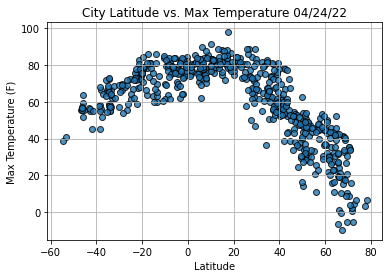

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

#Incorporate the other graph properties.
plt.title(f'City Latitude vs. Max Temperature '+ time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig1.png')

# Show plot.
plt.show()

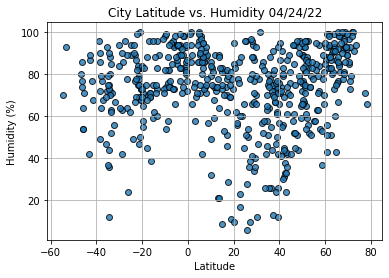

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           humidity,
           edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

#Incorporate the other graph properties.
plt.title(f'City Latitude vs. Humidity '+ time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig2.png')

# Show plot.
plt.show()

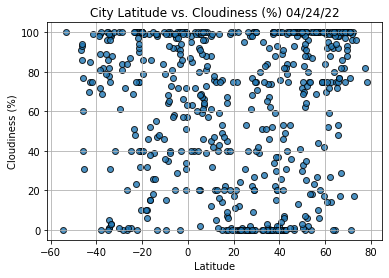

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           cloudiness,
           edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

#Incorporate the other graph properties.
plt.title(f'City Latitude vs. Cloudiness (%) '+ time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig3.png')

# Show plot.
plt.show()

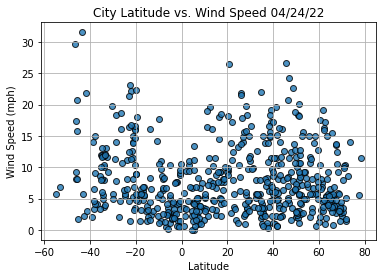

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           wind_speed,
           edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

#Incorporate the other graph properties.
plt.title(f'City Latitude vs. Wind Speed '+ time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig4.png')

# Show plot.
plt.show()